<IPython.core.display.Javascript object>


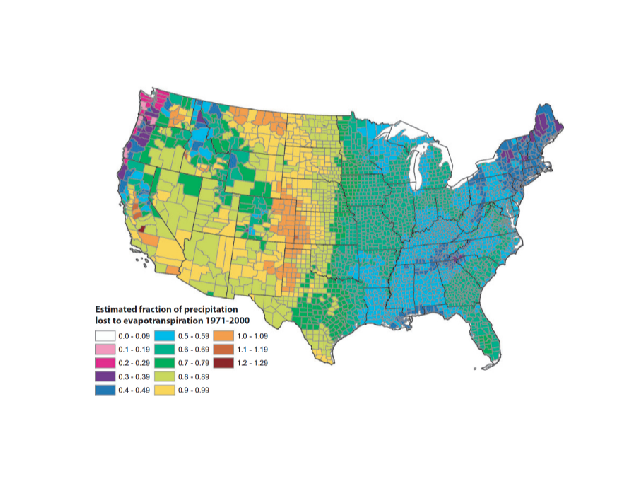

Button(button_style='danger', description='Quick Listen Mode', style=ButtonStyle())

Button(button_style='danger', description='Sustain Mode', style=ButtonStyle())

In [2]:
%matplotlib notebook

from __future__ import print_function

import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import matplotlib.image as mpimg
from PIL import Image
from ipywidgets import Button, HBox, VBox,Layout
from IPython.display import display, clear_output
import ipywidgets as widgets
import os
#from matplotlib import imshow

import ctcsound
import time

try:
    pt
except NameError:
    var_exists = False
else:
    pt.stop()
    pt.join()
    time.sleep(2)

cs = ctcsound.Csound()
csd_string = '''
<CsoundSynthesizer>
<CsOptions>
; Select audio/midi flags here according to platform
-odac    ;;;realtime audio out
;-iadc    ;;;uncomment -iadc if real audio input is needed too
; For Non-realtime ouput leave only the line below:
; -o pluck.wav -W ;;; for file output any platform
</CsOptions>
<CsInstruments>

sr = 44100
ksmps = 32
nchnls = 2
0dbfs  = 1

instr 1

kcps = p4
icps = p5
ifn  = 0
imeth = p6

asig pluck 0.7, kcps, icps, ifn, imeth, .1, 10
     outs asig, asig

endin
</CsInstruments>

<CsScore>
f 0 14400


</CsScore>

</CsoundSynthesizer>
'''

cs.compileCsdText(csd_string)
cs.start()

pt = ctcsound.CsoundPerformanceThread(cs.csound())
pt.play()

flagx = 0
flagy = 0
flag = 1

cwd = os.getcwd()
im = Image.open('%s/dep/images/rain_us.png'%(cwd), 'r')
width, height = im.size
pixel_values = list(im.getdata())
#print(pixel_values[width*20+20])
#r ,g , b , a = pixel_values[width*20+20]


with cbook.get_sample_data('%s/dep/images/rain_us.png'%(cwd)) as image_file:
    image = plt.imread(image_file)

    
    
fig, ax = plt.subplots()
ax.imshow(image)

ax.axis('off')  # clear x- and y-axes

#def on_motion(self, event):
        
 # global flag
        
 #      if self.press is None: 
#         return
 #           flag = event.xdata
            
        
  #      flag = event.xdata
        

button = widgets.Button(description="Quick Listen Mode",button_style='danger')
button2 = widgets.Button(description="Sustain Mode",button_style='danger') 
display(button)
display(button2)
    

def onclick(event):
    in_min = 0
    in_max = 255
    out_min = 50
    out_max = 500
    global flagx
    global flagy
    flagx = int(event.xdata)
    flagy = int(event.ydata)
    r , g , b , a = pixel_values[width*flagy+flagx]
    freq1 = (r - in_min) * (out_max - out_min) / (in_max - in_min) + out_min
    freq2 = (g - in_min) * (out_max - out_min) / (in_max - in_min) + out_min
    freq3 = (b - in_min) * (out_max - out_min) / (in_max - in_min) + out_min
    
    avg = (freq1 + freq2 + freq3 ) / 3
    if flag == 1 :
        pt.scoreEvent(False, 'i', (1, 0, 1, freq1, freq1, 1))
        pt.scoreEvent(False, 'i', (1, 0, 1, freq2, freq1, 1))
        pt.scoreEvent(False, 'i', (1, 0, 1, freq3, freq1, 1))
        
    if flag == 2 :
        pt.scoreEvent(False, 'i', (1, 0, 10, freq1, freq1, 1))
        pt.scoreEvent(False, 'i', (1, 0, 10, freq2, freq1, 1))
        pt.scoreEvent(False, 'i', (1, 0, 10, freq3, freq1, 1))

    
def on_button_clicked(b):  
    global flag
    flag = 1
    
def on_button2_clicked(b):  
    global flag
    flag = 2
    

    
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)
button.on_click(on_button_clicked)
button2.on_click(on_button2_clicked)